## Simple Linear Regression

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
import seaborn as sns
 

In [148]:
df = pd.read_csv('data/clean/immoscout_only_numeric.csv')
df.head(5)

,ForestDensityL,ForestDensityM,ForestDensityS,Latitude,Longitude,NoisePollutionRailwayL,NoisePollutionRailwayM,NoisePollutionRailwayS,NoisePollutionRoadL,NoisePollutionRoadM,...,gde_workers_total,type,rooms,floor,living_space_m2,floor_space_m2,plot_area_m2,availability,municipality,price
0,0.511176,0.286451,0.090908,47.415927,8.085840,0.0,0.0,0.0,0.058298,0.067048,...,331.0,penthouse,5.0,4,100.0,NaN,NaN,On request,Biberstein,1150000.0
1,0.511176,0.286451,0.090908,47.415927,8.085840,0.0,0.0,0.0,0.058298,0.067048,...,331.0,terrace-house,5.0,NaN,156.0,242.0,222,On request,Biberstein,1420000.0
2,0.163362,0.095877,0.001911,47.397416,8.043150,0.0,0.0,0.0,0.334957,0.381257,...,33493.0,penthouse,5.0,NaN,93.0,NaN,NaN,NaN,NaN,720000.0
3,0.511176,0.286451,0.090908,47.415927,8.085840,0.0,0.0,0.0,0.058298,0.067048,...,331.0,detached-house,5.0,NaN,154.0,257.0,370,On request,Biberstein,1430000.0
4,0.333865,0.279276,0.145835,47.404870,8.052781,0.0,0.0,0.0,0.133498,0.132933,...,1355.0,flat,5.0,0,142.0,NaN,NaN,On request,Küttigen,995000.0


In [149]:
def price_livingspace(df):
    name = df['type'][0]
    y = df['price'].values.reshape(1,-1)
    x = df['living_space_m2'].values.reshape(1,-1)
    #cleaning Data
    if np.any(np.isnan(x)) or np.any(np.isnan(y)):
        mask = ~pd.isna(x) & ~pd.isna(y)
        x = x[mask]
        y = y[mask]
        x = x.reshape(-1,1)
        y = y.reshape(-1,1)
    #Linear Regression
    model = LinearRegression(fit_intercept= True).fit(x, y)
    x_new = np.arange(x.min(),x.max()).reshape(-1,1)
    y_new = model.predict(x_new)
    #Test Score
    r_2 = model.score(x,y)
    print('R^2: ', r_2)
    plt.scatter(x,y)
    plt.plot(x_new,y_new, color = 'r')
    plt.ylabel('Preis in CHF')
    plt.xlabel('Fläche in m2')
    plt.title('Linear Regression für ' + name)
    plt.show()
    
    #Residuenanalyse verteilung
    predict= model.predict(x)
    resid = y-predict 
    plt.scatter(x,resid)
    plt.show()
    
    #Verteilung der Residuen
    n, bins, patches = plt.hist(resid, bins=100, facecolor='blue',stacked=True,density=True)

    mu = np.average(resid)
    sigma = np.std(resid)
    #Plot Normalverteilung
    y_norm = norm.pdf(bins, mu, sigma)
    plt.plot(bins, y_norm)
    plt.xlabel('Residuen')
    plt.ylabel('Häufigkeiten')
    plt.title('Residuenverteilung ' + name)
    plt.show()


In [150]:
def plot_linear_regression(dataframe):
    plt.scatter(dataframe['living_space_m2'], dataframe['price'])
    plt.xlabel('Preis in CHF')
    plt.ylabel('Living Space')
    plt.show()

R^2:  0.1399297920993643


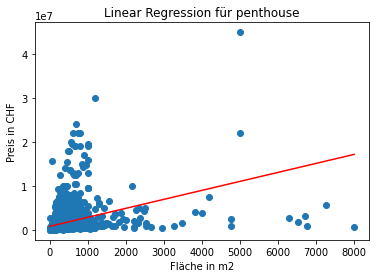

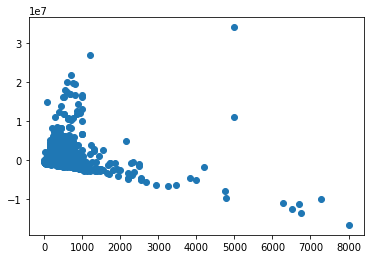

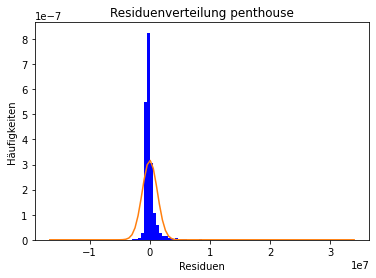

In [151]:
price_livingspace(df)

In [165]:
# Group by different type
df_castle = df[df['type'] == 'castle'].reset_index(drop=True)
df_attic_flat = df[df['type'] == 'attic-flat'].reset_index(drop=True)
df_attic_room = df[df['type'] == 'attic-room'].reset_index(drop=True)
df_chalet = df[df['type'] == 'chalet'].reset_index(drop=True)
df_detached_house = df[df['type'] == 'detached-house'].reset_index(drop=True)

R^2:  1.0


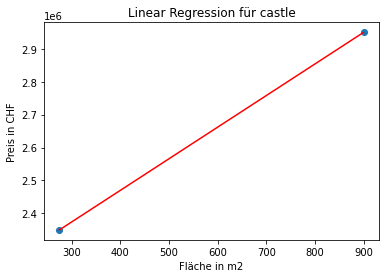

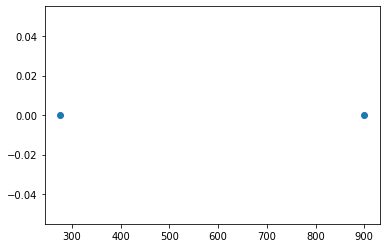

c:\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:1904: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:1904: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


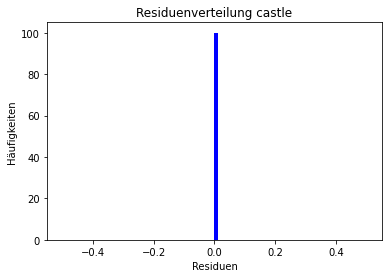

In [153]:
price_livingspace(df_castle)

R^2:  0.3883445971046541


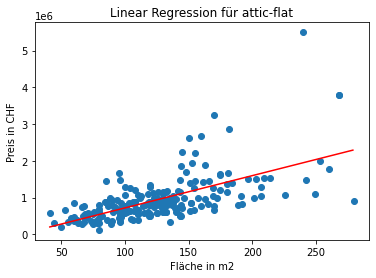

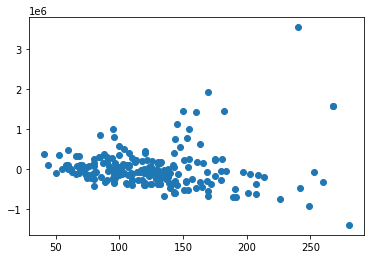

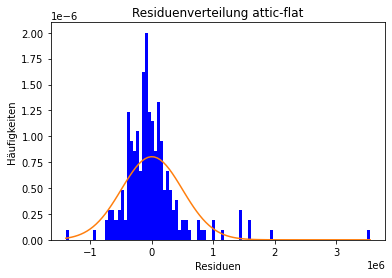

In [154]:
price_livingspace(df_attic_flat)

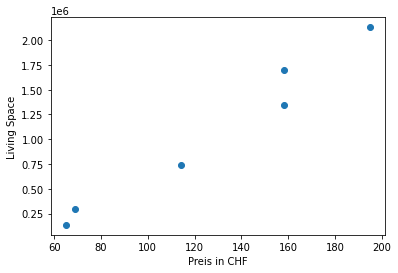

In [155]:
plot_linear_regression(df_attic_room)

In [166]:
price_livingspace(df_attic_room)

ValueError: X has 1 features, but LinearRegression is expecting 6 features as input.

R^2:  0.19571891684307274


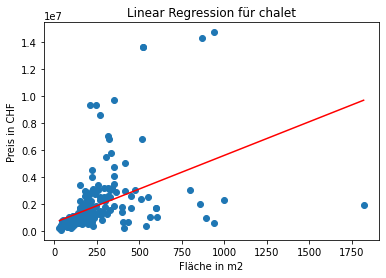

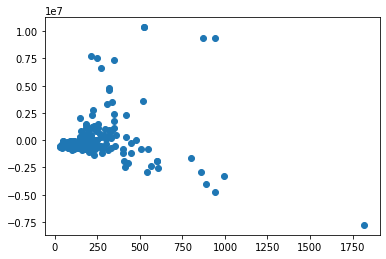

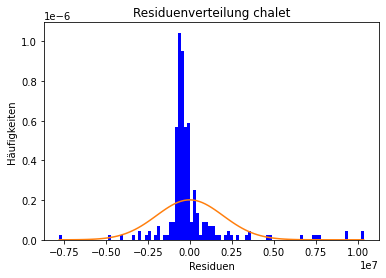

In [158]:
price_livingspace(df_chalet)

R^2:  0.12635892699741824


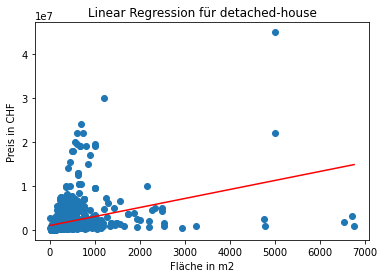

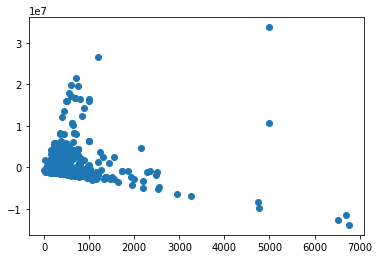

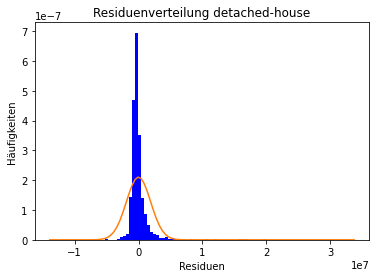

In [159]:
price_livingspace(df_detached_house)

## Fehlerbehebung manuel

In [160]:
df = df[df['type'] == 'attic-room'].reset_index(drop=True)
name = df['type'][0]
y = df['price'].values.reshape(1,-1)
x = df['living_space_m2'].values.reshape(1,-1)
#cleaning Data

mask = ~pd.isna(x) & ~pd.isna(y)
x = x[mask]
y = y[mask]
x = x.reshape(-1,1)
y = y.reshape(-1,1)



In [161]:
model = LinearRegression(fit_intercept= True).fit(x, y)
x_new = np.arange(x.min(),x.max()).reshape(-1,1)
y_new = model.predict(x_new)

R^2:  0.9721659988859433


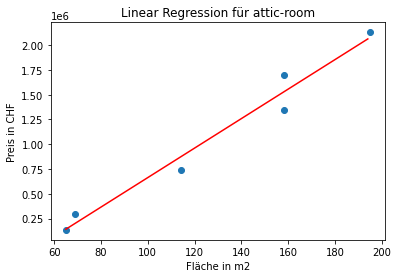

In [162]:
r_2 = model.score(x,y)
print('R^2: ', r_2)
plt.scatter(x,y)
plt.plot(x_new,y_new, color = 'r')
plt.ylabel('Preis in CHF')
plt.xlabel('Fläche in m2')
plt.title('Linear Regression für ' + name)
plt.show()

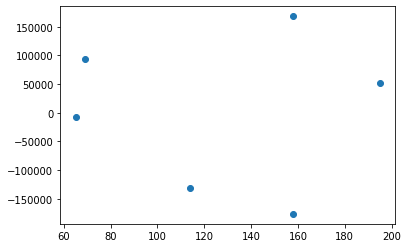

In [163]:
predict= model.predict(x)
resid = y-predict 
plt.scatter(x,resid)
plt.show()

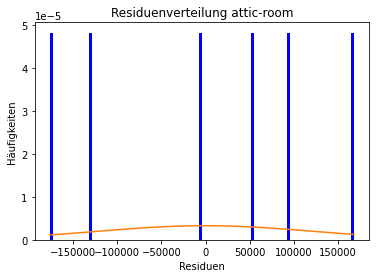

In [164]:
n, bins, patches = plt.hist(resid, bins=100, facecolor='blue',stacked=True,density=True)

mu = np.average(resid)
sigma = np.std(resid)
#Plot Normalverteilung
y_norm = norm.pdf(bins, mu, sigma)
plt.plot(bins, y_norm)
plt.xlabel('Residuen')
plt.ylabel('Häufigkeiten')
plt.title('Residuenverteilung ' + name)
plt.show()